In [1]:
import numpy as np
import pandas as pd
import math
import scipy.integrate
from scipy import constants
from scipy import stats
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sympy as sp
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad
from getdist import plots, MCSamples
import getdist
from scipy import interpolate
from scipy.interpolate import interp1d
plt.rcParams["figure.figsize"] = (20,18)
plt.style.use('/media/ash/1tb/github/HubbleConstant-ConstraintsForVCG/standard.mplstyle')

# Platinum data importation

In [2]:
#Platinum Sample 
#PLATINUM 50 isotropic (only minimizer)
GS1data=pd.read_csv("platinum50.txt", sep="\t")

ide=GS1data["GRBID"].to_numpy()
#Fluxes
logFp=np.log10(GS1data["EnergyFlux"].to_numpy()) # conversion to logarithm
logFa=GS1data["logFa"].to_numpy()
Fp=10**(logFp)
Fa=10**(logFa)

# Errors in Fluxes
logFperr=np.array(GS1data["EnergyFluxerr"].to_numpy()/(Fp*np.log(10)) ) #using $\delta$logf=$\delta$f/(f*ln10)
logFaerr=(GS1data["logFa_max"].to_numpy()-GS1data["logFa_min"].to_numpy())/2
Fa_err=logFaerr*np.log(10)*Fa
Fp_err=np.array(GS1data["EnergyFluxerr"].to_numpy())

                
# K correction in flux equation
Kp=GS1data["Kprompt"].to_numpy()
Ka=GS1data["kplateau"].to_numpy()
Kp_err=GS1data["KPrompterror"].to_numpy()
Ka_err=GS1data["dk"].to_numpy()


z=GS1data["z"].to_numpy() 

#Main terms                
logLp=GS1data["logLpeak"].to_numpy()
logLa=GS1data["logLumTa"].to_numpy()
logLp_err=GS1data["logLpeakerr"].to_numpy()
logLa_err=GS1data["logLumTaErr"].to_numpy()
logTa_rest=GS1data["logTa_best"].to_numpy()-np.log10(1+z) # 2nd term is added to make Ta in rest frame
logTaerr=(GS1data["logTa_max"].to_numpy()-GS1data["logTa_min"].to_numpy())/2

Ta_rest=10**(logTa_rest)
Lp=10**(logLp)
La=10**(logLa)
Ta_err=logTaerr*np.log(10)*Ta_rest
Lp_err=logLp_err*np.log(10)*Lp
La_err=logLa_err*np.log(10)*La

# Corrected Flux by the K correction
Fpcor = Fp * Kp
Facor = Fa * Ka

logFpcor = logFp + np.log10(Kp)
logFacor = logFa + np.log10(Ka)

                
                
# Corrected flux error by K correction
Fperrcor = ((Fp * Kp_err) ** 2 + (Kp * Fp_err) ** 2) ** 0.5
Faerrcor = ((Fa * Ka_err) ** 2 + (Ka * Fa_err) ** 2) ** 0.5


logFaerrcor = Faerrcor / (Facor * np.log(10))
logFperrcor = Fperrcor / (Fpcor * np.log(10))


[agostini] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {agostini: 96.6}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:-0.85, b:0.49, sv:0.34, omega_m:0.1, n:1.2, H0:70
[mcmc] Sampling! (NB: no accepted step will be saved until 300 burn-in samples have been obtained)
[mcmc] Progress @ 2023-05-25 17:40:03 : 1 steps taken -- still burning in, 300 accepted steps left.
[mcmc] Finished burn-in phase: discarded 300 accepted steps.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.393
[mcmc]  - Convergence of means: R-1 = 37.271863 after 192 accepted steps
[mcmc] Convergence less than requested for updates: waiting until the next convergence check.
[mcmc] Learn + convergence test @ 480 sam

/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 960 samples accepted.
[mcmc]  - Acceptance rate: 0.525
[mcmc]  - Convergence of means: R-1 = 14.471706 after 768 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 1200 samples accepted.
[mcmc]  - Acceptance rate: 0.503
[mcmc]  - Convergence of means: R-1 = 11.546033 after 960 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 1440 samples accepted.
[mcmc]  - Acceptance rate: 0.488
[mcmc]  - Convergence of means: R-1 = 8.128437 after 1152 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Progress @ 2023-05-25 17:41:03 : 4238 steps taken, and 1578 accepted.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 1680 samples accepted.
[mcmc]  - Acceptance rate: 0.464
[mcmc]  - Convergence of means: R-1 = 3.072572 after 1344 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 1920 samples accepted.
[mcmc]  - Acceptance rate: 0.442
[mcmc]  - Convergence of means: R-1 = 1.349781 after 1536 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 2160 samples accepted.
[mcmc]  - Acceptance rate: 0.416
[mcmc]  - Convergence of means: R-1 = 0.960383 after 1728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 2400 samples accepted.
[mcmc]  - Acceptance rate: 0.392
[mcmc]  - Convergence of means: R-1 = 0.425157 after 1920 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Progress @ 2023-05-25 17:42:03 : 7398 steps taken, and 2548 accepted.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 2640 samples accepted.
[mcmc]  - Acceptance rate: 0.371
[mcmc]  - Convergence of means: R-1 = 0.240865 after 2112 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.359
[mcmc]  - Convergence of means: R-1 = 0.272988 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.349
[mcmc]  - Convergence of means: R-1 = 0.257540 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Progress @ 2023-05-25 17:43:03 : 10072 steps taken, and 3333 accepted.
[mcmc] Learn + convergence test @ 3360 samples accepted.
[mcmc]  - Acceptance rate: 0.337
[mcmc]  - Convergence of means: R-1 = 0.222383 after 2688 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 3600 samples accepted.
[mcmc]  - Acceptance rate: 0.330
[mcmc]  - Convergence of means: R-1 = 0.124530 after 2880 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 3840 samples accepted.
[mcmc]  - Acceptance rate: 0.325
[mcmc]  - Convergence of means: R-1 = 0.127055 after 3072 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Progress @ 2023-05-25 17:44:03 : 12462 steps taken, and 4022 accepted.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 4080 samples accepted.
[mcmc]  - Acceptance rate: 0.319
[mcmc]  - Convergence of means: R-1 = 0.123550 after 3264 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 4320 samples accepted.
[mcmc]  - Acceptance rate: 0.312
[mcmc]  - Convergence of means: R-1 = 0.155497 after 3456 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 4560 samples accepted.
[mcmc]  - Acceptance rate: 0.308
[mcmc]  - Convergence of means: R-1 = 0.110952 after 3648 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Progress @ 2023-05-25 17:45:03 : 14773 steps taken, and 4625 accepted.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 4800 samples accepted.
[mcmc]  - Acceptance rate: 0.304
[mcmc]  - Convergence of means: R-1 = 0.083971 after 3840 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))
/tmp/ipykernel_11765/1396171900.py:23: RuntimeWarning: invalid value encountered in double_scalars
  ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
/tmp/ipykernel_11765/1396171900.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, 0, i, args=(omega_m, n))


[mcmc] Learn + convergence test @ 5040 samples accepted.
[mcmc]  - Acceptance rate: 0.300
[mcmc]  - Convergence of means: R-1 = 0.074015 after 4032 accepted steps
[mcmc]  - Convergence of bounds: R-1 = 0.144289 after 5040 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 5040 accepted steps.
[root] *WARNING* outlier fraction 0.0002834467120181406 
Using 3 sigma
Mean
[-0.87225621  0.4913421   1.06022459  0.19586999  1.44720645 70.40621038]
1 sigma:
[0.0690938  0.00436056 0.06493961 0.11883875 1.39744837 0.67431663]
Covariance matrix:
[[ 4.77395302e-03 -2.93299160e-04  3.89826890e-04  5.80583582e-04
  -3.04593300e-03 -2.81036153e-04]
 [-2.93299160e-04  1.90144408e-05 -2.54838026e-05 -9.11120556e-05
  -2.81418054e-04 -3.57424453e-05]
 [ 3.89826890e-04 -2.54838026e-05  4.21715356e-03 -2.49274538e-05
   2.92584115e-03 -2.64319018e-03]
 [ 5.80583582e-04 -9.11120556e-05 -2.49274538e-05  1.41226473e-02
  -3.71496591e-02 -4.44162212e-03]
 [-3.04593300e-03 -2.81418054e-

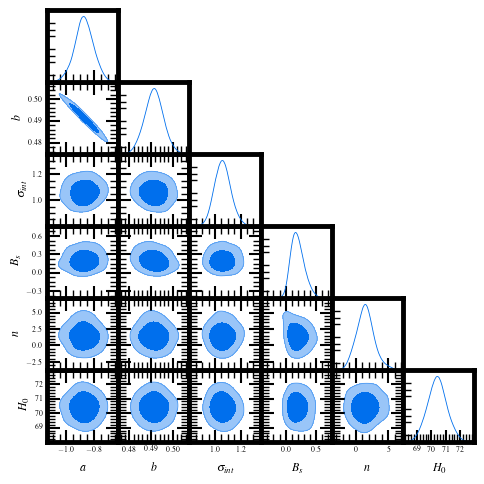

In [6]:
#Varying Omega_M with Evolution
#This means we apply k-correction to La, Lp, Fa, Fp 

conversionfrom_cm_to_Mpc=3.08567758*10**24
def my_like(a, b, sv, omega_m, n,H0):
    c = 25.4
    a1 = a / (2 * (1 - b))
    b1 = b / (2 * (1 - b))
    c1 = (np.log10(4 * np.pi) * (b - 1) + c) / (2 * (1 - b))
    d1 = -1.0 / (2 * (1 - b))
    h = H0 / 100
    #H0_s = H0 / (3.085677581491367 * 10 ** 19) # Converting Km and Mpc to cm
    c_cm = scipy.constants.c * 100
    ckm = 299792.458

    omega_b0 = 0.0000245
    omega_r0=0.02



    def integrand(x, omega_m, n):
        return 1/(pow((1+x),2)*(omega_r0+(omega_b0/(1+x))+
        ((1-omega_b0-omega_r0)*((omega_m*(1+x)**6)+(1-omega_m)*(1+x)**n)**(0.5)/(1+x)**(4)))**(0.5))
    
    coefGRB=(ckm/H0)*(1+z)

    d_par = np.array([])
    for i in z:
        I = quad(integrand, 0, i, args=(omega_m, n))
        d_par = np.append(d_par, I[0])

    #d = np.array(c_cm * (1 + zGRB) * d_par / H0_s)
    d = np.array(coefGRB*d_par)
    
    logdl_th = np.log10(d)
        
    logint_obGRB = ((logTa_rest * a1) + (logFpcor * b1) + 
    c1 + (d1 * logFacor) - np.log10(conversionfrom_cm_to_Mpc))
    
    muth = 5 * logdl_th + 25
    muob = (5 * logint_obGRB) + 25
    sv_muob = np.sqrt((5 * a1 * logTaerr) ** 2 + (5 * b1 * logFperrcor) ** 2 +
                      (5 * d1 * logFaerrcor) ** 2 + sv ** 2)
    # Now we define the chi^2 for GRB
    chi2_GRB = np.sum(((muth - muob)/(sv_muob))**2)
    
    #We take the loglikelihood defined in Equa. 17 of Sharov 2018, https://arxiv.org/pdf/1807.07323.pdf
    
    logliketotal= - np.sum(np.log(sv_muob)) - (1/2)*chi2_GRB
    return(logliketotal)
guess=[-0.85, 0.49, 0.34,0.3, 70]
a,b,sv,O_m,H0=guess

info = {"likelihood": {"agostini": my_like}} 

from collections import OrderedDict as odict
#info related to the parameters inside the likelihood 
#Ref = reference value from which to start the MCMC chain, proposed confidence interval
for i in range(3,4,1):
    info["params"] = odict([
         ["a", {
            "prior": 
            { "dist": "norm", "loc": -0.86, "scale": i*0.13},
             "ref": a,"proposal":0.001}],
        ["b", {
            "prior": {"dist": "norm", "loc": 0.56, "scale": i*0.12},
            "ref": b,"proposal":0.001}],
        ["sv", {
            "prior": {"dist": "norm", "loc": 0.34, "scale": i*0.04}, 
            "ref": sv, "latex":r"\sigma_{int}","proposal":0.001}],
        ["omega_m", {
            "prior": { "dist": "norm", "loc": 0.11, "scale": 5*0.03}, "ref": 0.1,
            "latex": r"B_s","proposal":0.001}],
        ["n", {
            "prior": {"dist": "norm", "loc": 1.25, "scale": 5*0.26}, "ref": 1.2,
            "latex": r"n","proposal":0.001}],
       ["H0", {
            "prior": {"dist": "norm", "loc":70.4, "scale": 5*0.13}, "ref": 70,
            "latex": r"H_0","proposal":0.001}] ])


#Settings to start the MCMC chain # Gelman-Rubin test accuracy
    info["sampler"] = {
    "mcmc": {"burn_in": 300, "max_samples": 10000000, "Rminus1_stop": 0.1,
             "Rminus1_cl_stop": 0.2, "learn_proposal": True}}
#info["output"] = "chains/agostini"

#load the settings defined in cobaya
    from cobaya.run import run

    updated_info, products = run(info)

    from getdist.mcsamples import MCSamplesFromCobaya
    import getdist.plots as gdplt

    gdsamples = MCSamplesFromCobaya(updated_info, products.products()["sample"],ignore_rows=0.3)
    gdplot = gdplt.getSubplotPlotter(width_inch=5)
#gdplot.triangle_plot(gdsamples, ["O_k"], filled=True)
#gdplot.triangle_plot(gdsamples, ["H0","O_m"], filled=True)
#p1 = gdsamples.getParams()
#O_m1=p1.O_m
#gdsamples.addDerived(O_m1, name='O_m1', label=r"\Omega_{M}")
    gdplot.triangle_plot(gdsamples, ["a","b","sv","omega_m", "n", "H0"], filled=True)

    mean = gdsamples.getMeans()[:6]
    sigma = np.sqrt(np.array(gdsamples.getVars()[:6]))
    covmat = gdsamples.getCovMat().matrix[:6, :6]
    plt. savefig("figures/grb.pdf", format="pdf", bbox_inches="tight")
    print("Using "+ str(i) + " sigma")
    print("Mean")
    print(mean)
    print("1 sigma:")
    print(sigma)
    print("Covariance matrix:")
    print(covmat)  